<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


**Logistic Regression**
<br>
A logistic regression (aka binary logistic regression) has a binary dv
<br>
*Examples:* true/flase, male/female, win/lose
<br>
Can be extended to any number of categorical outcomes (aka multinomial logistic regression) what deep neural networks are implementing for image recognition
<br>

**What is the outcome of logidtic regression**
<br>
Alogistic regression does not classify; it returns probabilities of category membership
<br>
Classification can be implemennted using threshold e.g., r > .5
```
ln p / 1 - p = Beta0 + Beta1 x1 + ... +  Betak xk
```
the right hand side is stnadard regression, the left hand side is viewed as the natural log of the ration of the probability of an event happening to the probability of the event not happening, which is the *odds ratio*
<br>
**Why take the log of probabilites**
<br>
The log of small values has a larger dynamic range and is easier to work with in optimization problems, by increasing the dynamic range that helps the parameters make the model best fit the data.
<br>
Also the odds ratio before taking the natural log will look like a flat line
<br>
**How to find the best regression coefficients**
<br>
The nonlinearities in the coefficients prevent the left inverse from being a viable solution
<br>
Iterative methods such as gradient descent are applied to find the set of parameters that make the probabilities best match the dependent variable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

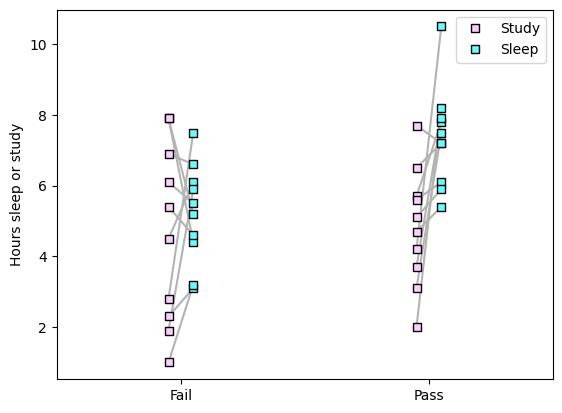

In [3]:
## generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

# and plot
for i in range(n):
    plt.plot([exam_outcome[i]-.05, exam_outcome[i]+.05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome+.05*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [6]:
##logistic regression

#create model
logregmodel = LogisticRegression(solver='newton-cg')

#create the design matrix
desmat = np.vstack((study_hours, sleep_hours)).T

logregmodel.fit(desmat, np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

[-7.15491116]
[[0.10742138 1.05067754]]


In [7]:
predval = logregmodel.predict(desmat) #class labels
predvalP = logregmodel.predict_proba(desmat) #probability values

print(predval)
print(np.array(exam_outcome))

logregmodel.score(desmat, np.array(exam_outcome))

[0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


0.75

**Section Break**
<br>

**Under- and over-fitting**
<br>
*Over-fitting*

* Overly sensitive to noise
* Increased sensitivity to subtle effects
* Reduced gneralizsbility
* Over-parameterized models become difficult to estimate

*Under-fitting*

* Less sensitive to noise
* Less likely to detect true effects
* Reduces generalizability
* Parameters are better estimated
* Good results with less data

<br>

**How to know the correct number of parameters?**
<br>

How to make sure the model is sufficiently complex that youre not under fitting the data but also sufficiently simple that you are not over fitting the data ?
<br>

With 1-2 dimensions: Visualize the data and make informed decision
<br>

With 3 + dimensions: Formal model comparisons
<br>

**Hidden overfittng: 'researcher degrees of freedom**
<br>
The researcher has many choices for how to clean organize, and select the data; and which models to run.

**F Test for model comparison**
<br>

F is statistically significant : More parameters improve the model *Prefer the more comp;icated model*
<br>

F is non significant: The model with fewer parameters fits as well as the model with more parameters. Prefer the simple model.